In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from tqdm import tqdm
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [11]:
TRAIN_PATH = "model-images/Training Data/"
TEST_PATH = "model-images/Testing Data/"
VALIDATION_PATH = "model-images/Validation Data/"
IMAGE_SIZE = (150, 150)

In [12]:
LABELS = os.listdir(TRAIN_PATH)
print(f"{len(LABELS)} classes \n{LABELS=}")

5 classes 
LABELS=['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


In [6]:
labels_distribution_train = [len(os.listdir(TRAIN_PATH + label)) for label in LABELS]
labels_distribution_test = [len(os.listdir(TEST_PATH + label)) for label in LABELS]
labels_distribution_valid = [len(os.listdir(VALIDATION_PATH + label)) for label in LABELS]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=LABELS,
    y=labels_distribution_train,
    name="train set",
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=LABELS,
    y=labels_distribution_test,
    name="test set",
    marker_color='lightblue'
))
fig.add_trace(go.Bar(
    x=LABELS,
    y=labels_distribution_valid,
    name="validation set",
    marker_color='lightsalmon'
))
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [9]:
def load_data(dir):
    images = []
    labels = []
    for folder in os.listdir(dir):
        for image_path in tqdm(os.listdir(os.path.join(dir, folder))):
            image = cv2.imread(os.path.join(dir, folder, image_path))
            image = cv2.resize(image, IMAGE_SIZE)
            
            images.append(image)
            labels.append(LABELS.index(folder))

    images = np.array(images)
    labels = to_categorical(labels)
    labels = labels.reshape(labels.shape[0], len(LABELS), 1)

    return images, labels

In [8]:
def display_sample_images(images, labels):
    fig = plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(LABELS[np.argmax(labels[i])])
    plt.show()

In [9]:
x_train, y_train = load_data(TRAIN_PATH)
x_train = x_train / 255
y_train = y_train.reshape(-1,5)

x_train, y_train = shuffle(x_train, y_train)

100%|██████████| 2000/2000 [00:01<00:00, 1129.23it/s]


In [10]:
print(f"{x_train.shape=}")
print(f"{y_train.shape=}")

x_train.shape=(10000, 150, 150, 3)
y_train.shape=(10000, 5)


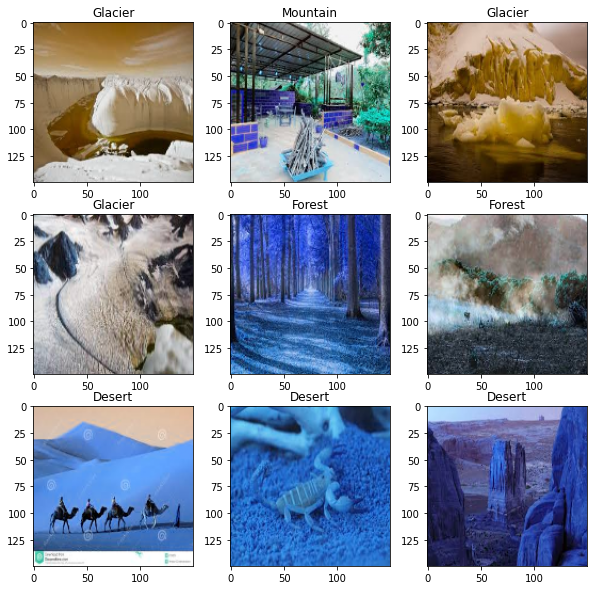

In [11]:
display_sample_images(x_train, y_train)

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
batch_size = 128
epochs = 10

model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/10
79/79 - 126s - loss: 1.0108 - accuracy: 0.6212 - 126s/epoch - 2s/step
Epoch 2/10
79/79 - 114s - loss: 0.7495 - accuracy: 0.7146 - 114s/epoch - 1s/step
Epoch 3/10
79/79 - 119s - loss: 0.6721 - accuracy: 0.7513 - 119s/epoch - 2s/step
Epoch 4/10
79/79 - 120s - loss: 0.6134 - accuracy: 0.7690 - 120s/epoch - 2s/step
Epoch 5/10
79/79 - 117s - loss: 0.5411 - accuracy: 0.7966 - 117s/epoch - 1s/step
Epoch 6/10
79/79 - 124s - loss: 0.4373 - accuracy: 0.8409 - 124s/epoch - 2s/step
Epoch 7/10
79/79 - 119s - loss: 0.3644 - accuracy: 0.8675 - 119s/epoch - 2s/step
Epoch 8/10
79/79 - 120s - loss: 0.2773 - accuracy: 0.9022 - 120s/epoch - 2s/step
Epoch 9/10
79/79 - 119s - loss: 0.1957 - accuracy: 0.9337 - 119s/epoch - 2s/step
Epoch 10/10
79/79 - 117s - loss: 0.1185 - accuracy: 0.9617 - 117s/epoch - 1s/step


In [ ]:
model.save("./model/nn.h5")

In [3]:
SAVED_MODEL_PATH = "./model/nn.h5"
model = tf.keras.models.load_model(SAVED_MODEL_PATH)

In [7]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 128)     

In [17]:
model.evaluate(x_train, y_train, batch_size=128, verbose=2)

157/157 - 34s - loss: 0.0554 - accuracy: 0.9843 - 34s/epoch - 217ms/step


[0.0553501658141613, 0.9843000173568726]

In [13]:
x_test, y_test = load_data(TEST_PATH)
x_test = x_test / 255
y_test = y_test.reshape(-1,5)

x_test, y_test = shuffle(x_test, y_test)

print(f"{x_test.shape=}")
print(f"{y_test.shape=}")

100%|██████████| 100/100 [00:00<00:00, 719.45it/s]


x_test.shape=(500, 150, 150, 3)
y_test.shape=(500, 5)


In [14]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

8/8 - 2s - loss: 1.0037 - accuracy: 0.7960 - 2s/epoch - 242ms/step


[1.0036541223526, 0.7960000038146973]

In [15]:
predictions = model(x_test)

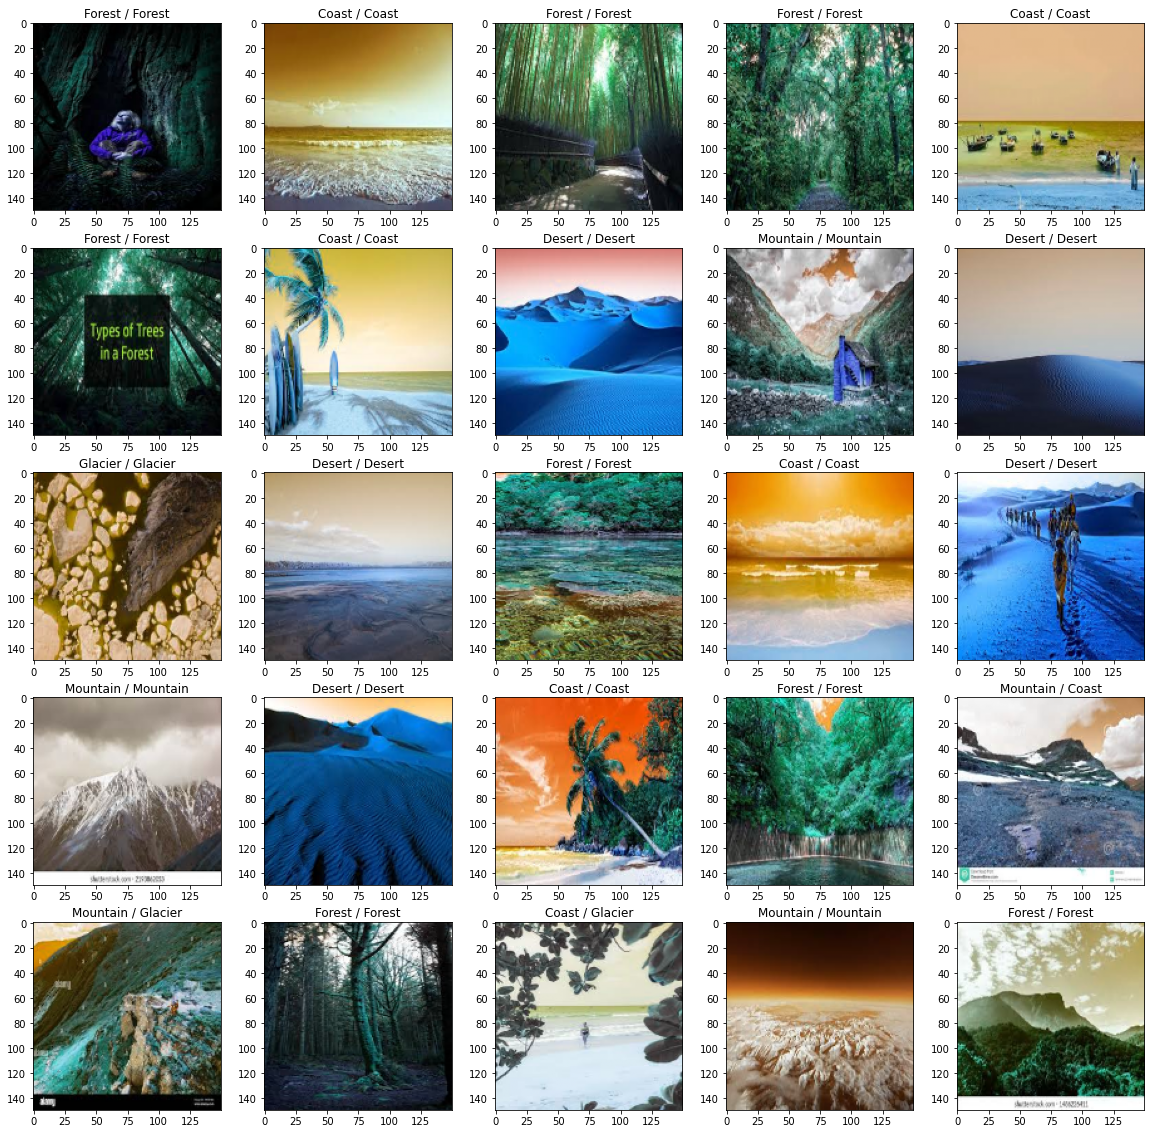

In [16]:
fig = plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"{LABELS[np.argmax(y_test[i])]} / {LABELS[np.argmax(predictions[i])]}")
plt.show()